In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 5,random_state = 3)

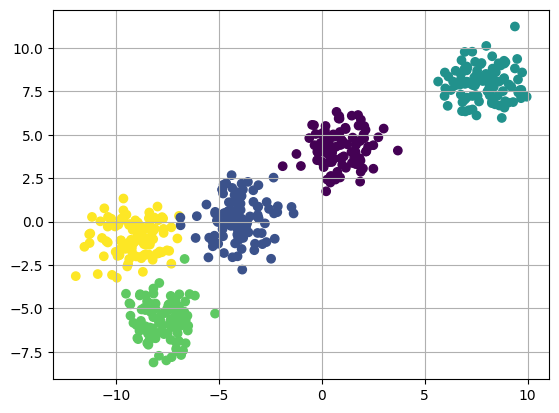

In [3]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Random Intialization of Centers

In [4]:
k = 5

colors = ['green','yellow','blue','cyan','red']

clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : points,
        'color' : colors[i]
    }
    clusters[i] = cluster

In [5]:
clusters

{0: {'center': array([ 7.61692259, -0.61656048]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-3.75336213, -4.29117798]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([-8.50929436,  6.29314144]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-9.41806837,  4.19471578]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([-7.20262271, -7.19719091]),
  'points': [],
  'color': 'red'}}

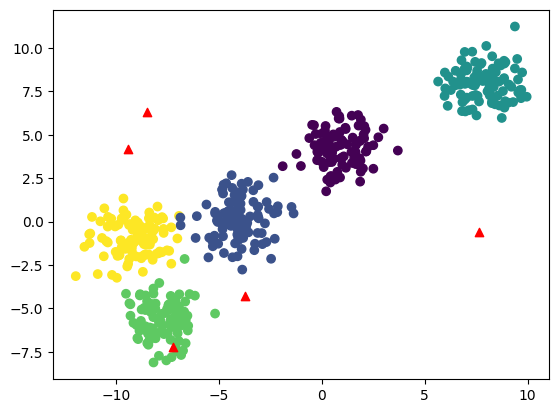

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')

plt.show()

Assign each point to nearest center

In [7]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [8]:
a = np.array([1,2])
b = np.array([3,4])
distance(a,b)

2.8284271247461903

In [9]:
def assign_clusters():
    # E-Step
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]

        for i in range(k):
            d = distance(curr_x,clusters[i]['center'])
            dist.append(d)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)

In [10]:
def plotClusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        try:
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],c = 'black',marker = '^')

Update Center location by taking mean

In [11]:
def update_clusters():
    for idx in range(k):
        pts = np.array(clusters[idx]['points'])
        if pts.shape[0] > 0:
            new_center = pts.mean(axis = 0)
            clusters[idx]['center'] = new_center

            clusters[idx]['points'] = []

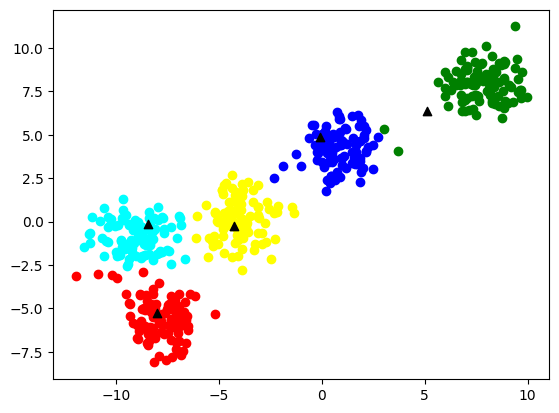

In [13]:
assign_clusters()
plotClusters()
update_clusters()

Scikit Learn K - Means

In [14]:
from sklearn.cluster import KMeans

In [15]:
km = KMeans(n_clusters = 5)

In [16]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 5,random_state = 3)

In [17]:
km.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [18]:
centers = km.cluster_centers_

In [19]:
labels = km.labels_

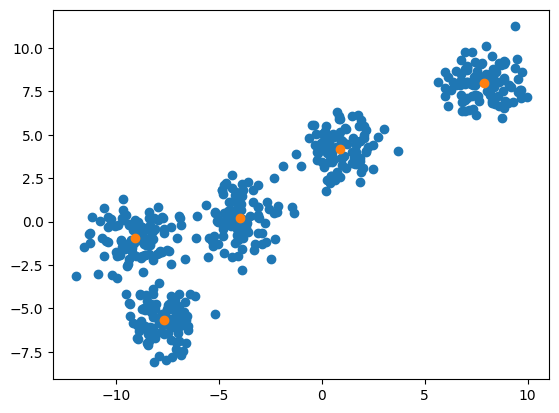

In [21]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()